## Lending Club Case Study

### Data understanding

#### Problem Statement:

A finance service company called the Lending Club offers customers to lend various types of loans. Some of the types of loans are business loans, personal loans, educational loans, home loans etc. 

When an applicant applies for a loan, the company has to take a decision for a loan approval based on the applicant’s information. 

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

#### Business Objective:

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### Assumption

The dataset consists of data dictionary and loans details issued from 2007 to 2011 by the Lending Club. 

Since the company wants to understand the driving factor behind a defaults, only those variables will be considered for the analysis. These variables will be helpful in helping the investor to take a decision on whether or not to invest in the loan request. Customer behaviour information provided in the dataset will not be considered

Importing the required libraries for the analysis.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [77]:
lc_df = pd.read_csv('loan.csv')

In [78]:
lc_df.shape

(39717, 111)

In [79]:
lc_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

### Data Cleaning and Manipulation

Let's clean the dataset provided by first removing columns with the most missing values or NA. The threshold we would consider would be 80%

In [80]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [81]:
# calculating the percentage of the missing value and checking for those specific columns
null_columns = round(lc_df.isnull().sum()/lc_df.shape[0] * 100)
missing_val_col = null_columns[null_columns > 80]
missing_val_col

mths_since_last_record             93.0
next_pymnt_d                       97.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0


In [82]:
missing_val_col = list(missing_val_col.index)
missing_val_col

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [83]:
# Dropping the columns mentioned in missing_val_col
lc_df.drop(missing_val_col, axis = 1,inplace = True)
lc_df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   
1       60 months   15.27%        59.83     C        C4  ...          119.66   
2       36 months   15.96%        84.33     C        C5  ...          649.91   
3       36 months   13.49%       339.31     C        C1  ...          357.48   
4       60 months   12.69%        67.79     B        B5  ...           67.79   
...           ...      ...          ...   ...       ...  ...             ...   
39712   36 months    8.07%        78.42     A        A4  ...           80.90   
39713   36 months   10.28%       275.38     C        C1  ...          281.94   
39714   36 months    8.07%       156.84     A        A4  ...            0.00   
39715   36 months    7.43%       155.38     A        A2  ...            0.00   
39716   36 months   13.75%       255.43     E        E2  ...          256.59   

      last_credit_pull_d collections_12_mths_ex_med  policy_code  \
0                 May-16                        0.0            1   
1                 Sep-13                        0.0            1   
2                 May-16                        0.0            1   
3                 Apr-16                        0.0            1   
4                 May-16                        0.0            1   
...                  ...                        ...          ...   
39712             Jun-10                        NaN            1   
39713             Jul-10                        NaN            1   
39714             Jun-07                        NaN            1   
39715             Jun-07                        NaN            1   
39716             Jun-10                        NaN            1   

      application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
0           INDIVIDUAL              0                      0.0           0   
1           INDIVIDUAL              0                      0.0           0   
2           INDIVIDUAL              0                      0.0           0   
3           INDIVIDUAL              0                      0.0           0   
4           INDIVIDUAL              0                      0.0           0   
...                ...            ...                      ...         ...   
39712       INDIVIDUAL              0                      NaN           0   
39713       INDIVIDUAL              0                      NaN           0   
39714       INDIVIDUAL              0                      NaN           0   
39715       INDIVIDUAL              0                      NaN           0   
39716       INDIVIDUAL              0                      NaN           0   

      pub_rec_bankruptcies tax_liens  
0                      0.0       0.0  
1                      0.0       0.0  
2                      0.0       0.0  
3                      0.0       0.0  
4                      0.0       0.0  
...                    ...       ...  
39712                  NaN       NaN  
39713                  NaN       NaN  
39714                  NaN       NaN  
39715                  NaN       NaN  
39716                  NaN 

In [84]:
lc_df.shape

(39717, 55)

#### Conclusion: Custom behaviour variables should be dropped as well, since they don't add any value to our investigation.

["delinq_2yrs",
"earliest_cr_line",
"inq_last_6mths",
"open_acc", 
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d",
"application_type"]

# TODO

"delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "application_type"

In [85]:
# Dropping the columns considered as customer behaviour variables
lc_df_columns = ["delinq_2yrs",
"earliest_cr_line",
"inq_last_6mths",
"open_acc", 
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d",
"application_type",
"url",
"zip_code",
"addr_state",
"desc",
"title"]
lc_df.drop(lc_df_columns, axis = 1, inplace = True)
lc_df.shape

(39717, 29)

1. url : URL for LC page with each memberid, hence it does not contribute for analysis.
2. addr_state : addr_state,zip_code does not contribute to analysis since its member portfolio information.
3. desc : Loan description provided by the borrower, therefore it won't be helpful in the analysis.
4. title : is a loan title provided by the borrower, therefore it won't be helpful in the analysis.
5. member_id : id provided to the loan, hence it does not contribute for analysis.
6. id: unique id provided to the member, hence it does not contribute for analysis
7. initial_list_status: is a initial listing status of the loan.The only value found in the dataset is F.Therefore it won't be helpful in the analysis.
8. collections_12_mths_ex_med: is number of collections made in 12 months excluding medical collections. The only value found in the dataset is 0.Therefore it won't be helpful in the analysis.
9. policy_code: is a column of the policy code for the loan. The value in the dataset is 1, which means all are publicly available, hence nothing to contribute for analysis
10. acc_now_delinq: is a no of account in which borrowers are delinquent. The values present in the entire dataset is 0, hence it won't contribute for analysis.
11. chargeoff_within_12_mths: no. of charge off within 12 months. The values present in the entire dataset is 0, hence it won't contribute for analysis.
12. delinq_amnt: is a past due amount owed to the lender. The values present in the entire dataset is 0, hence it won't contribute for analysis.
13. tax_liens: is a no. of tax liens. The values present in the entire dataset is 0, hence it won't contribute for analysis.
14. mths_since_last_delinq: DOUBT in this!!!!!!!!!
15. pub_rec_bankruptcies: is a no. of bankcruptcies declared by the borrowers. Since the customer can file bankruptcy insurance against it it won't affect the financial stature of the borrower. Hence it won't contribute for analysis.

In [86]:
lc_df_columns = ["id",
"member_id",
"initial_list_status",
"collections_12_mths_ex_med", 
"policy_code",
"acc_now_delinq",
"chargeoff_within_12_mths",
"delinq_amnt",
"tax_liens",
"mths_since_last_delinq",
"pub_rec_bankruptcies"
]
lc_df.drop(lc_df_columns, axis = 1, inplace = True)
lc_df.shape

(39717, 18)

##### Since the applicant is in the process of paying the installments and the tenure of the loan has not yet been completed. These candidates are not labelled as 'defaulted'. Hence wont be consired for the analysis.

In [87]:
lc_df = lc_df[lc_df["loan_status"] != "Current"]

In [88]:
lc_df.shape

(38577, 18)

In [89]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_title            36191 non-null  object 
 9   emp_length           37544 non-null  object 
 10  home_ownership       38577 non-null  object 
 11  annual_inc           38577 non-null  float64
 12  verification_status  38577 non-null  object 
 13  issue_d              38577 non-null  object 
 14  loan_status          38577 non-null  object 
 15  pymnt_plan           38577 non-null 

 #### Variables considered in the data analysis
 
 1.   loan_amnt            is the loan amount requested by the borrower.  
 2.   funded_amnt          is the total amount committed to the loan at that point in time.
 3.   funded_amnt_inv      is total amount committed by investors for that loan at that point in time.
 4.   term                 The number of payments on the loan. Values are in months and can be either 36 or 60.
 5.   int_rate             Interest Rate on the loan
 6.   installment          The monthly payment owed by the borrower if the loan originates.
 7.   grade                LC assigned loan grade
 8.   sub_grade            LC assigned loan subgrade
 9.   emp_title            The job title supplied by the Borrower when applying for the loan.
 10.  emp_length           Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
 11.  home_ownership        The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
 12.  annual_inc            The self-reported annual income provided by the borrower during registration.
 13.  verification_status   Indicates if income was verified by LC, not verified, or if the income source was verified 
 14.  issue_d               The month which the loan was funded
 15.  loan_status           Current status of the loan. Possible values are Fully Paid, Charged Off and Current
 16.  pymnt_plan            Indicates if a payment plan has been put in place for the loan
 17.  purpose               A category provided by the borrower for the loan request.
 18.  dti                   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [90]:
lc_df["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [91]:
# Since emp_length have nan values removing those rows
lc_df = lc_df[~lc_df.emp_length.isnull()]

In [272]:
# Correcting format of Interest rate Column and Changing type 
lc_df['int_rate'] = lc_df.int_rate.str.strip('%').astype(float)

In [273]:
lc_df.shape

(37544, 24)

In [274]:
lc_df['issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

#### Added two columns derived from issue date of the loan into issue_d_month and issue_d_year

In [275]:
lc_df["issue_d"] = pd.to_datetime(lc_df["issue_d"], format='%b-%y')
lc_df['issue_d_month'] = pd.to_datetime(lc_df['issue_d']).dt.month
lc_df['issue_d_year'] = pd.to_datetime(lc_df['issue_d']).dt.year

In [276]:
# Checking for null values in the final dataset considered for the analysis
lc_df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              1408
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
pymnt_plan                0
purpose                   0
dti                       0
Borr_Agency               0
agency_Inves              0
issue_d_month             0
issue_d_year              0
Ratio_loan_funded         0
ratio_loan_funded         0
dtype: int64

In [277]:
lc_df["term"].unique()

array(['36', '60'], dtype=object)

In [278]:
# Picking only the numeric value which is 36 and 60 in order to plot a better graph
lc_df['term'] = lc_df.term.apply(lambda x: x.split()[0])
lc_df['term']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 37544, dtype: object

In [279]:
lc_df["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [280]:
lc_df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [281]:
lc_df["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [282]:
lc_df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [283]:
lc_df["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [284]:
lc_df["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Data Analysis

List of categorical variables which can be investigated based on their unique unordered values

1. loan_status
2. term
3. grade
4. sub_grade
5. emp_title
6. emp_length
7. home_ownership
8. verification_status
9. purpose

In [285]:
# Create two different dataset categorised by loan_status e.i Fully Paid and Charged Off
lc_fully_paid = lc_df[lc_df['loan_status'] == "Fully Paid"]
lc_charged_off = lc_df[lc_df['loan_status'] == "Charged Off"]

## Univariant analysis

   ### Loan Status


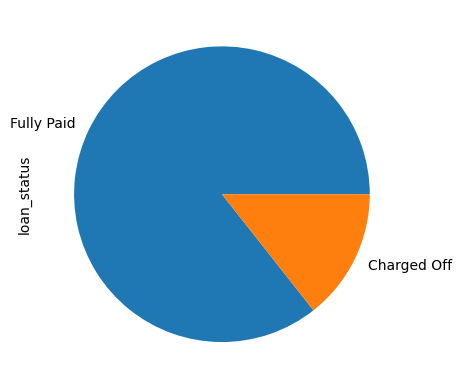

In [287]:
lc_df['loan_status'].value_counts().plot.pie()
plt.show()

Observation : Maximum loans are fully paid

### Ordered Categorical Variables

### Term

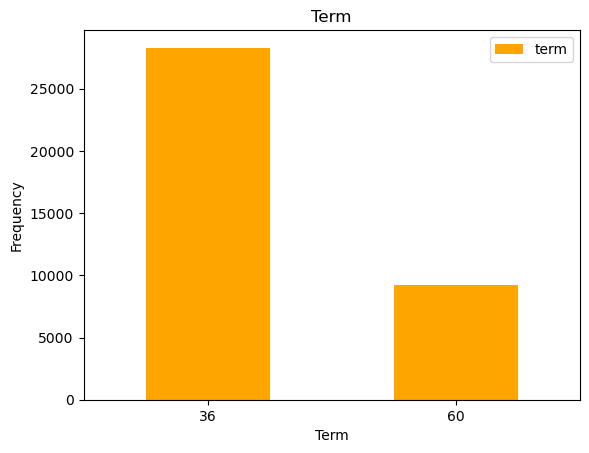

In [154]:
lc_df.term.value_counts().plot(kind='bar' , color = 'Orange')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Term')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

#sns.set_style("Set2")
#sns.barplot(x = 'index' , y = lc_df.term.value_counts() , data = lc_df)

Insight: Borrowers have taken 36 months tenure loan more than 60 months.

# Grade

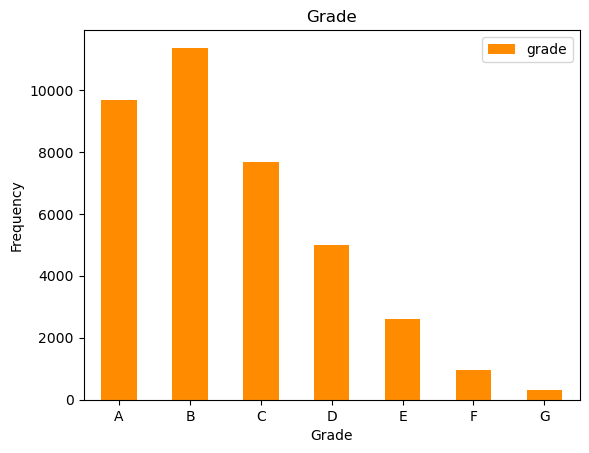

In [155]:
lc_df.grade.value_counts().sort_index().plot(kind='bar' , color = 'DarkOrange')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Insight: Most Borrowers comes under A and B grade.

# Sub Grade



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


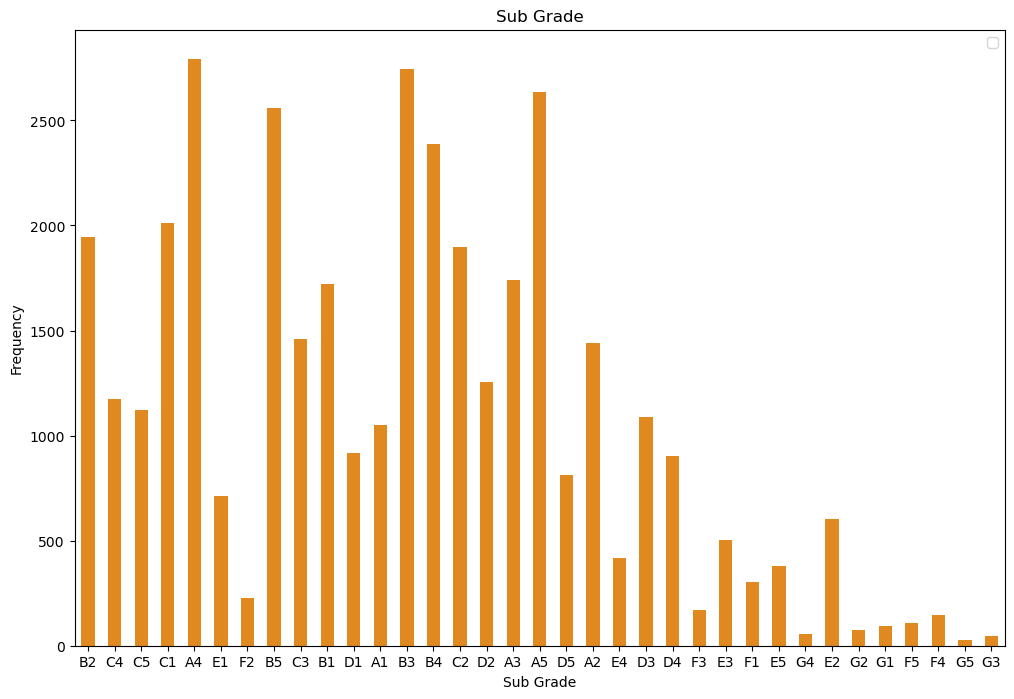

In [156]:
fig, ax = plt.subplots( figsize=(12,8))
sns.countplot(x = 'sub_grade' , data = lc_df, width= 0.5, color= 'Darkorange')
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
plt.title('Sub Grade')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()
#order= lc_df['sub_grade'].sort_index())
#plt.subplots_adjust(hspace= 15, wspace=15)


## Interest Rate

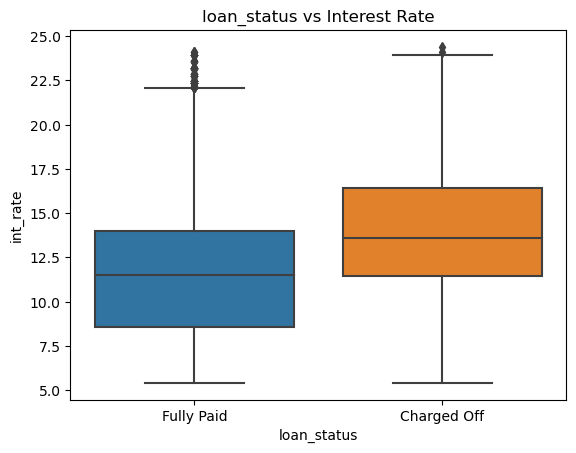

In [288]:
sns.boxplot(x='loan_status', y=lc_df.int_rate , data = lc_df)
plt.title('loan_status vs Interest Rate')
plt.show()

Observation : Interest Rate is higher for Charged off customer.

## Employee Length

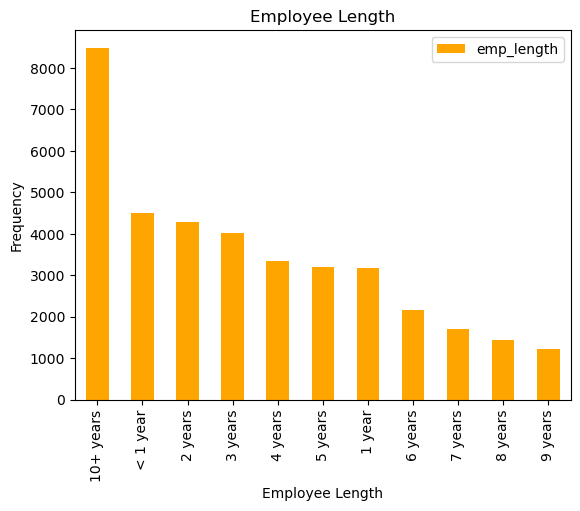

In [158]:
lc_df.emp_length.value_counts().plot(kind='bar', color = 'Orange')
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.title('Employee Length')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

Observation : Most Borrowers are mostly 10+ years employeement Length

### Unordered Categorical Variables

##  Home Ownership

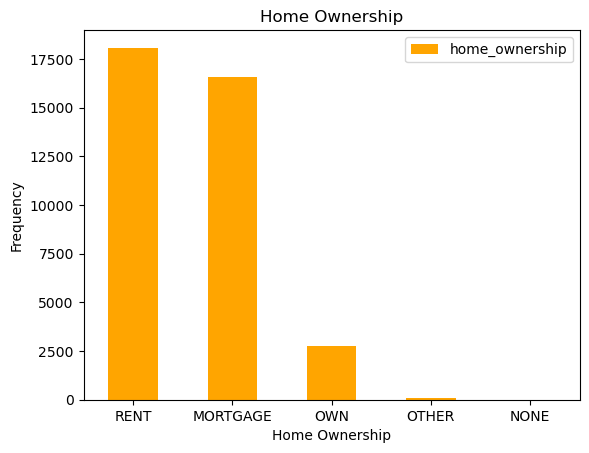

In [159]:
lc_df.home_ownership.value_counts().plot(kind='bar', color = 'Orange')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.title('Home Ownership')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Observation : Maximum loan taken are renter

## Verification Status

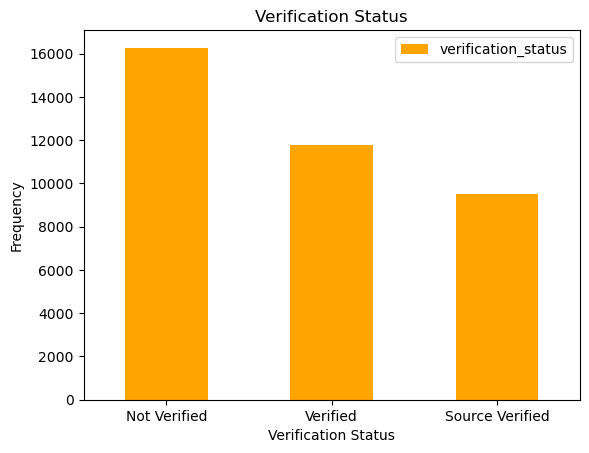

In [161]:
lc_df.verification_status.value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
plt.title('Verification Status')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

Observation : Most Borrowers are 'Not Verified'. 

## Purpose

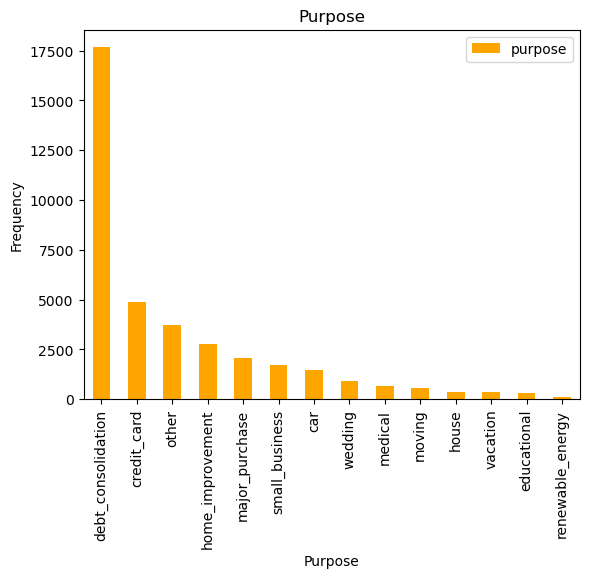

In [162]:
lc_df.purpose.value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

Observation : Maximum loan taken for Debt Consolidation purpose

### Quantitative Variables

# Loan Amount

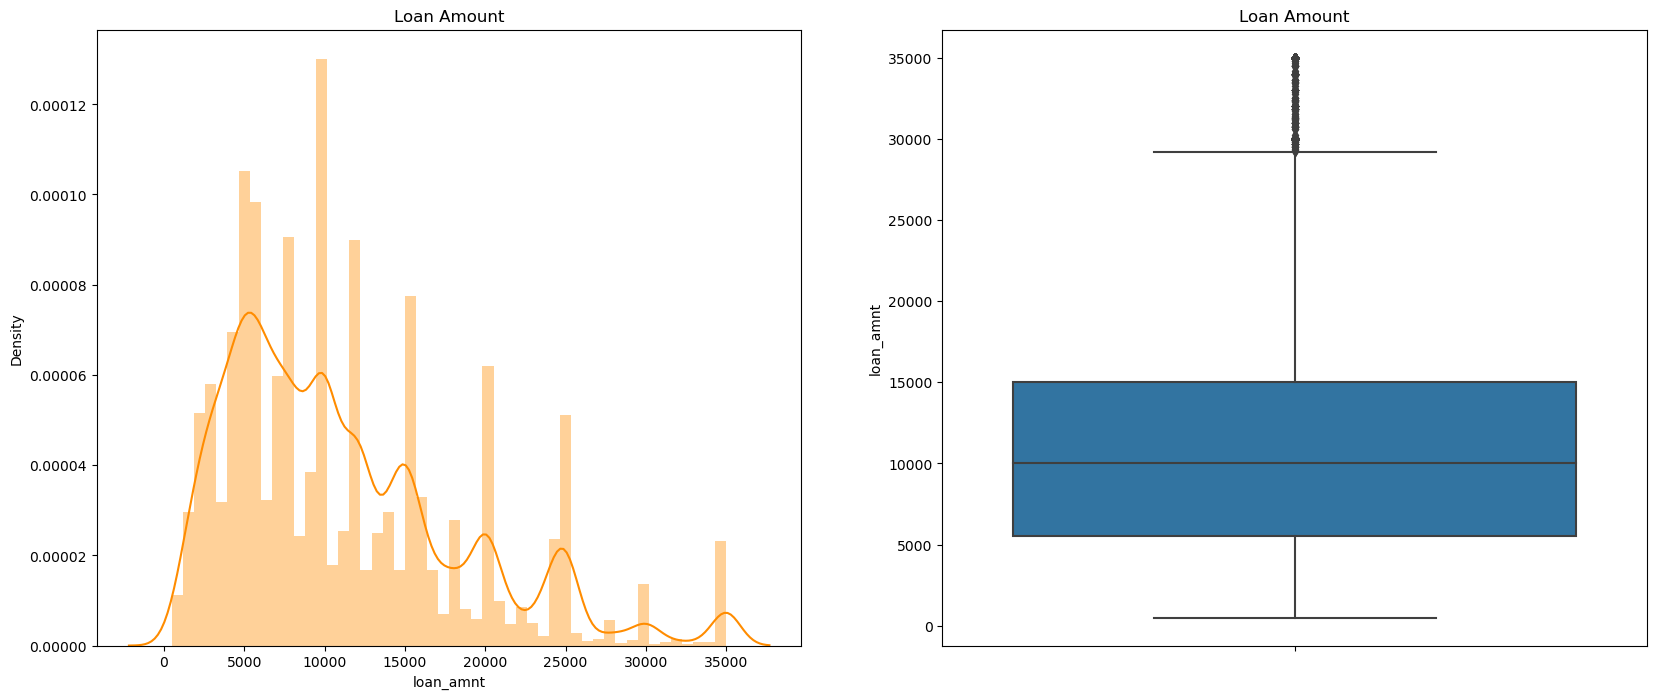

In [163]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.distplot(lc_df.loan_amnt ,color = 'darkorange' )
plt.title('Loan Amount')
plt.subplot(122)
sns.boxplot(y=lc_df.loan_amnt)
plt.title('Loan Amount')
plt.show()

Observation : Maximum people took 10000 loan.

## Segmented Univariate Analayis

## Loan Amount

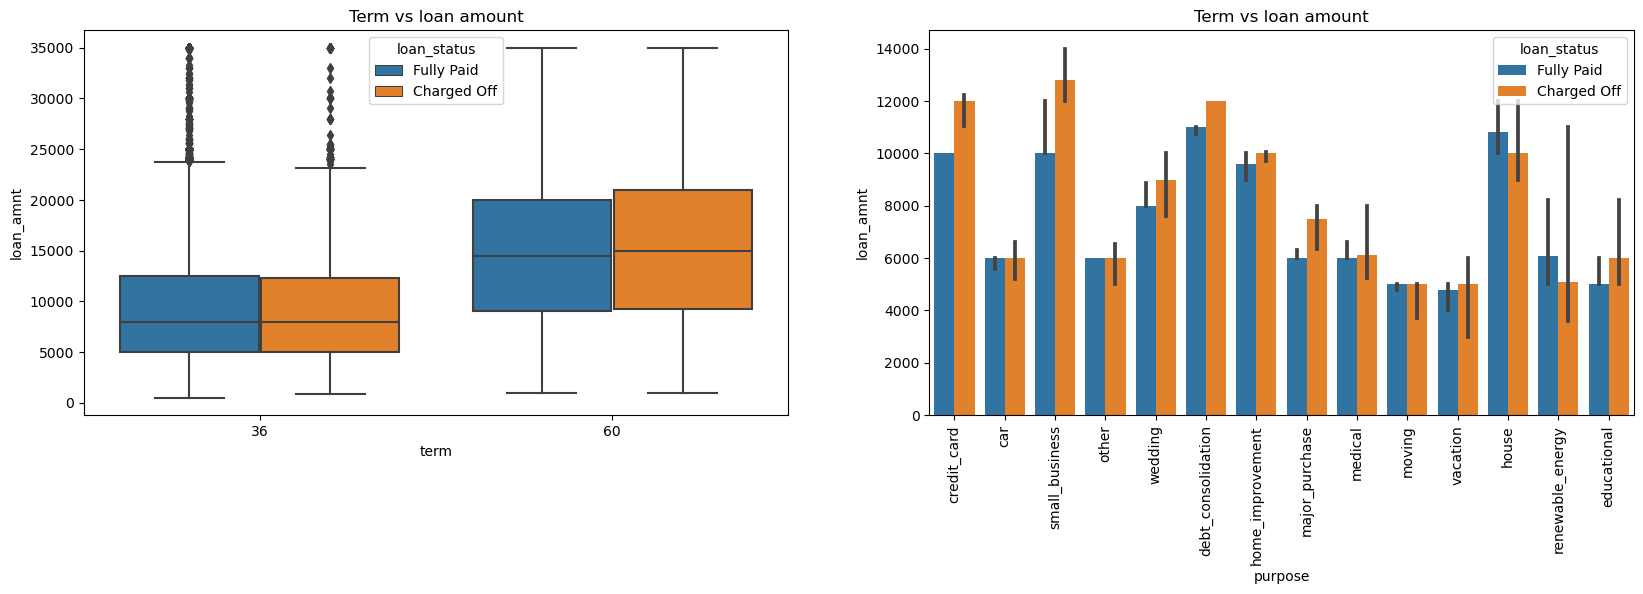

In [193]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=lc_df)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=lc_df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Purpose vs loan amount')
plt.show()

Observations:
Higher amount loans have high tenure i.e, 60 months and higher duration loans are more chargedoff as 
compare to shorter duration.
Small Bussiness have higher charges of charged off and house loan are maximum paid back fully


## Home Ownership VS Loan amount , Verification Status Vs Loan Amount 

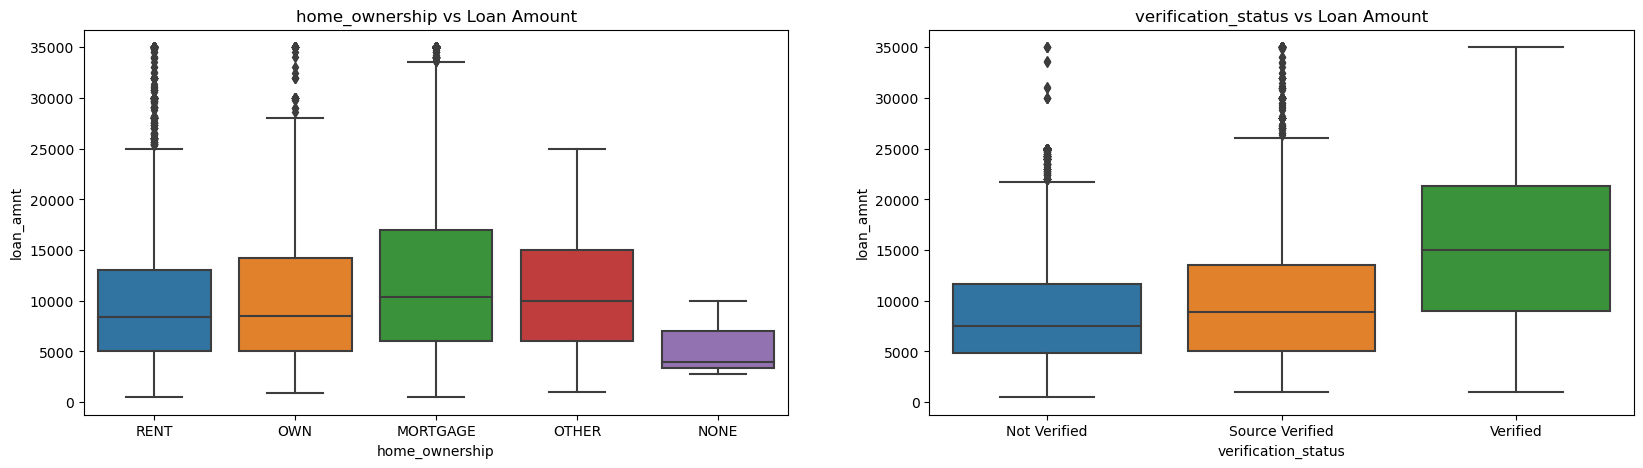

In [299]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=lc_df.loan_amnt, data=lc_df)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = lc_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=lc_df.loan_amnt, order = verification_status_ord, data=lc_df)
plt.show()

Observation : More borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9000

## Purpose Vs Loan Amount

Text(0.5, 1.0, 'purpose vs Loan Amount')

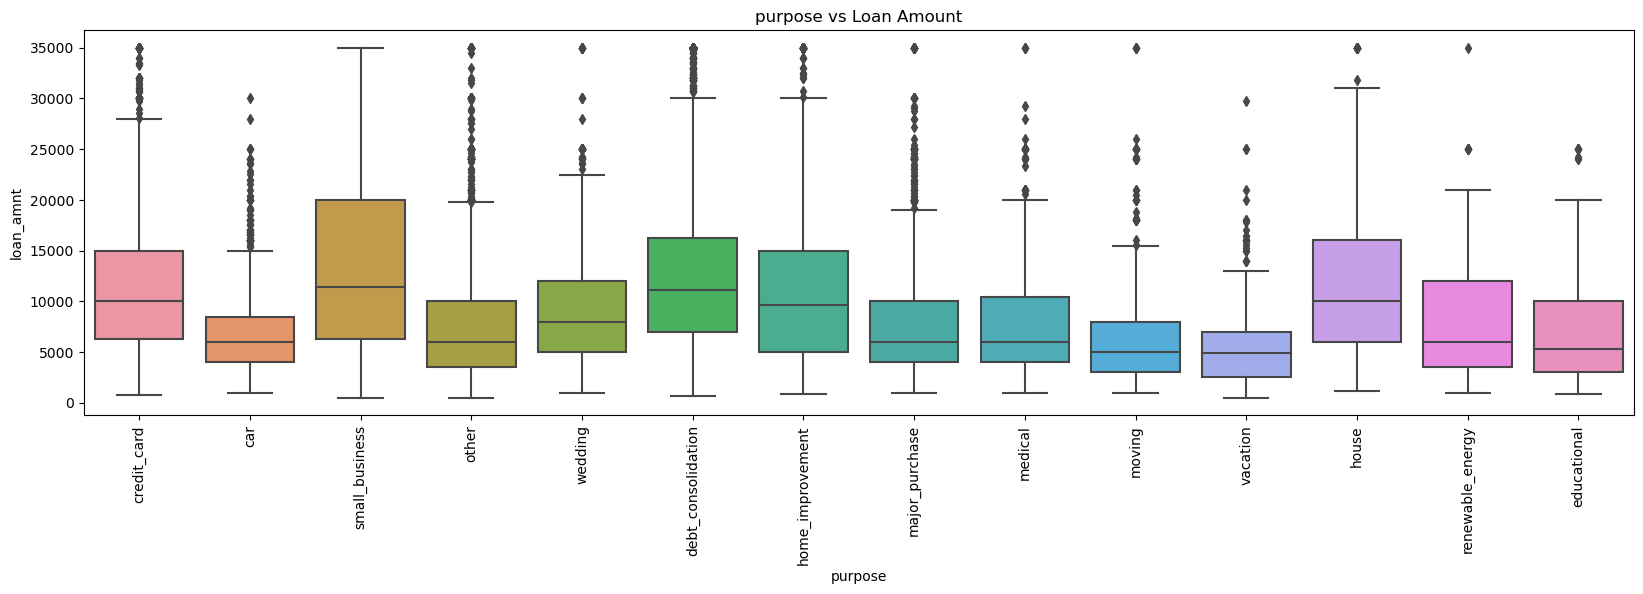

In [198]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=lc_df.loan_amnt, data=lc_df)
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

Observation : More loan amount is from Small bussiness followed by debt consolidation.

## Term Vs Interest Rate , Grade Vs Interest Rate

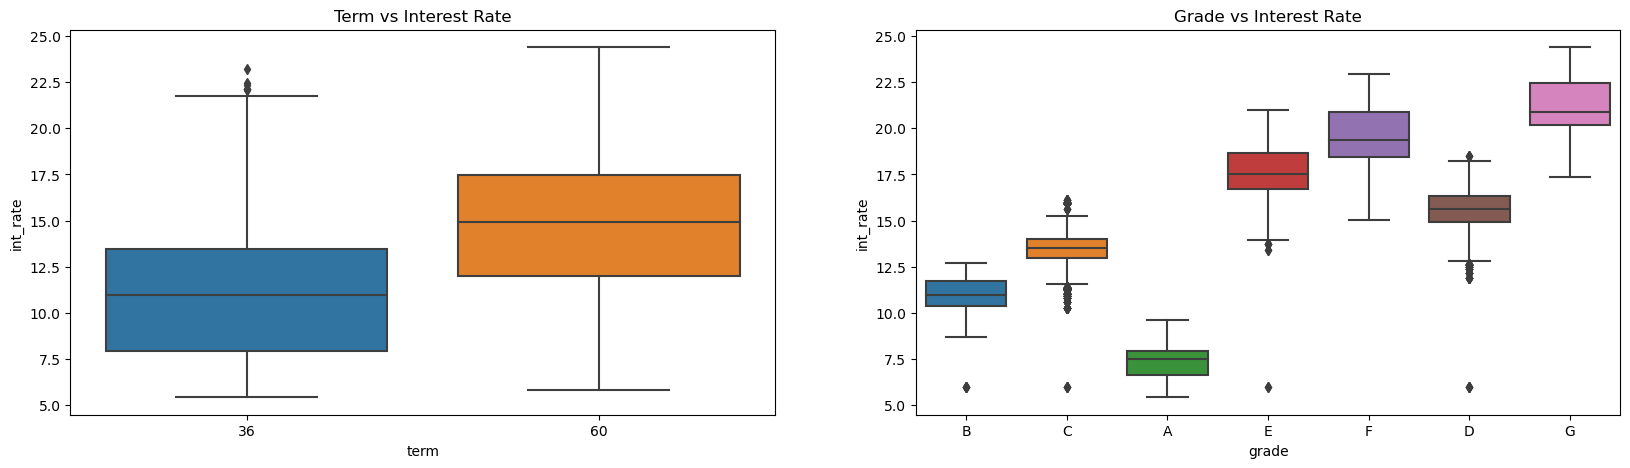

In [289]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lc_df.int_rate, data=lc_df)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
sns.boxplot(x='grade', y=lc_df.int_rate, data=lc_df)
plt.show()

Observation: The interest rates are higher for Higher tenure loans.Also Interest Rates are Higher as Grades are 
Lowering (A to G).

## Purpose Vs Interest Rate 

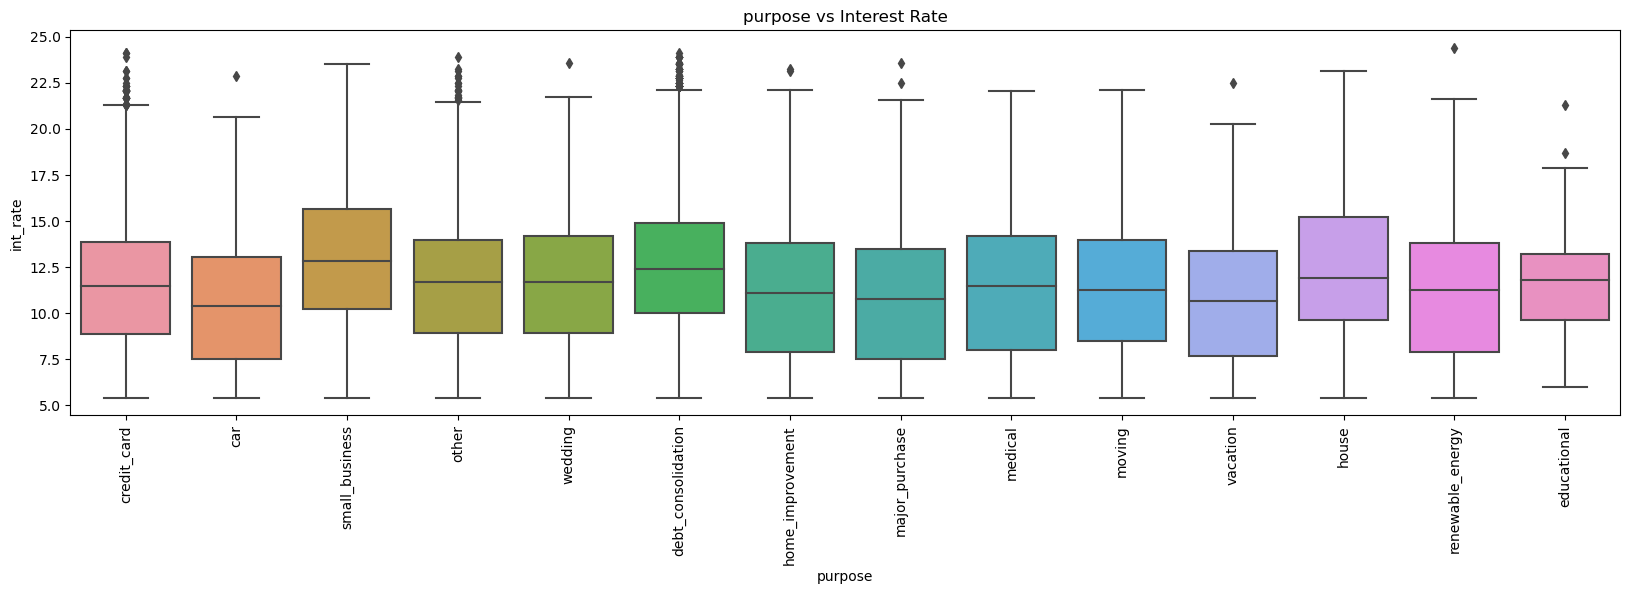

In [291]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=lc_df.int_rate, data=lc_df)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')
plt.show()

Observation : Interest Rate is higher for Small Business, Debt Consolidation and House loans.

## DTI(Debt to Income Ratio) VS Terms, DTI VS Grade
 

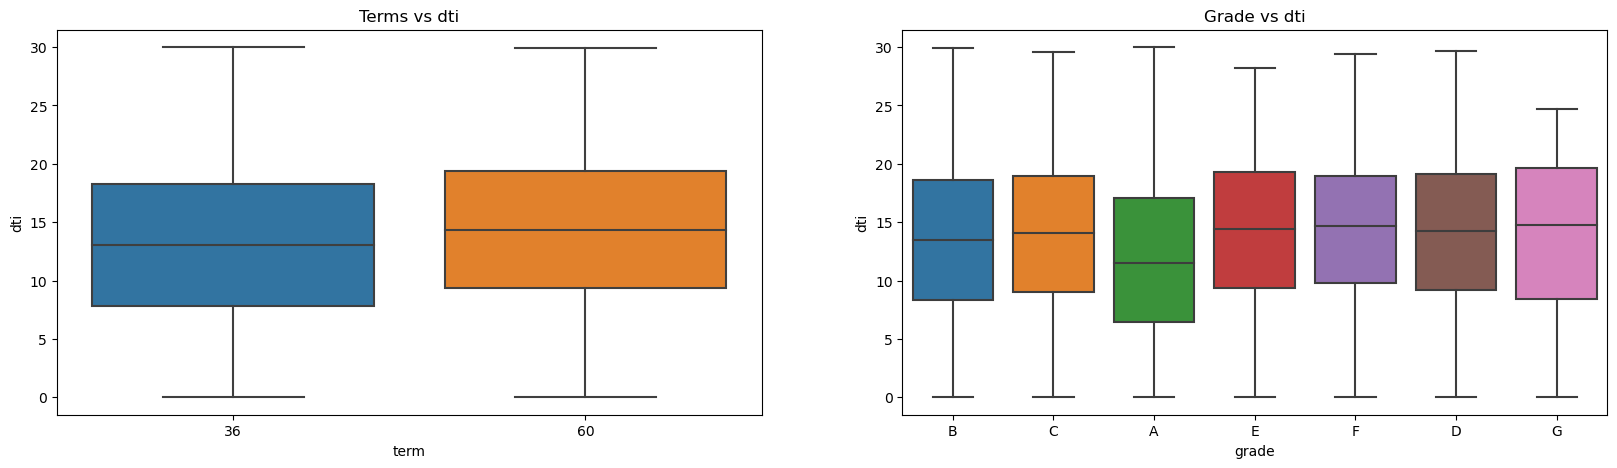

In [292]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lc_df.dti, data=lc_df)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
sns.boxplot(x='grade', y=lc_df.dti, data=lc_df)
plt.show()

Observation:DTI is bit high for people who got more tenure i.e., 60 months. A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

## Grade Vs Loam Amount 

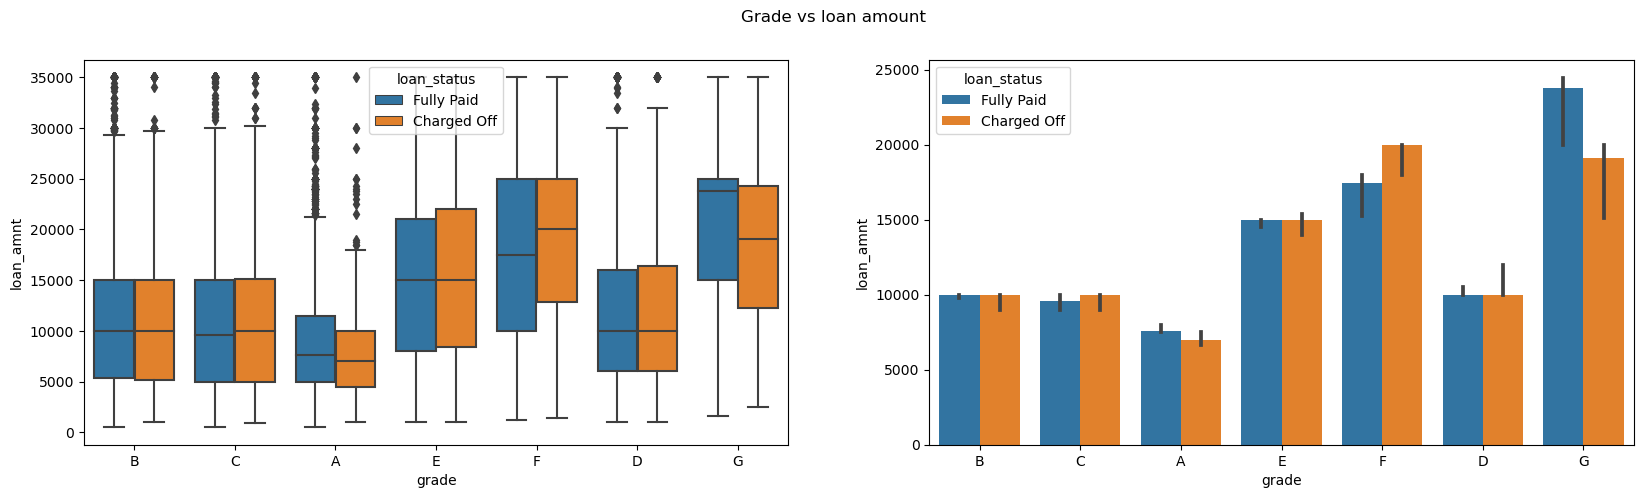

In [297]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=lc_df)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=lc_df, estimator=np.median,)
plt.suptitle('Grade vs loan amount')
plt.show()

Observations: For lower grades 'F' and 'G' there are more difference between charged-off and fully paid. The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

## Grade Vs Loan Status

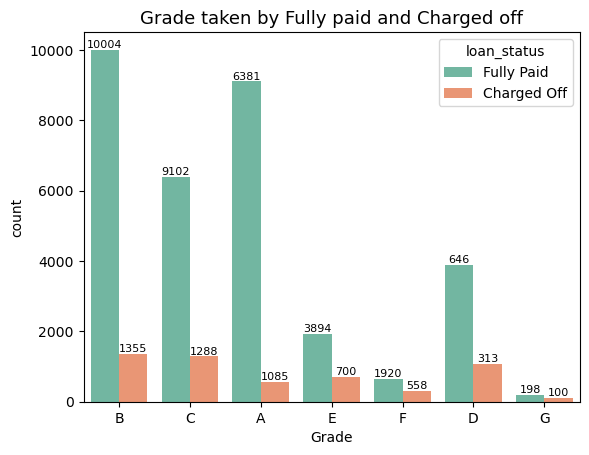

In [167]:
g1 = sns.countplot(x="grade",data=lc_df, 
              palette="Set2", 
              hue = "loan_status")
label_values = lc_fully_paid['grade'].value_counts()
g1.bar_label(container = g1.containers[0], labels=label_values, fontsize=8)

label_values1 = lc_charged_off['grade'].value_counts()
g1.bar_label(container = g1.containers[1], labels=label_values1, fontsize=8)

g1.set_title("Grade taken by Fully paid and Charged off", fontsize=13)
g1.set_xlabel("Grade")
plt.show()

In [ ]:
Observation : C is higher 

In [168]:
lc_df.groupby('loan_status')['grade'].describe()

count unique top   freq
loan_status                         
Charged Off   5399      7   B   1355
Fully Paid   32145      7   B  10004

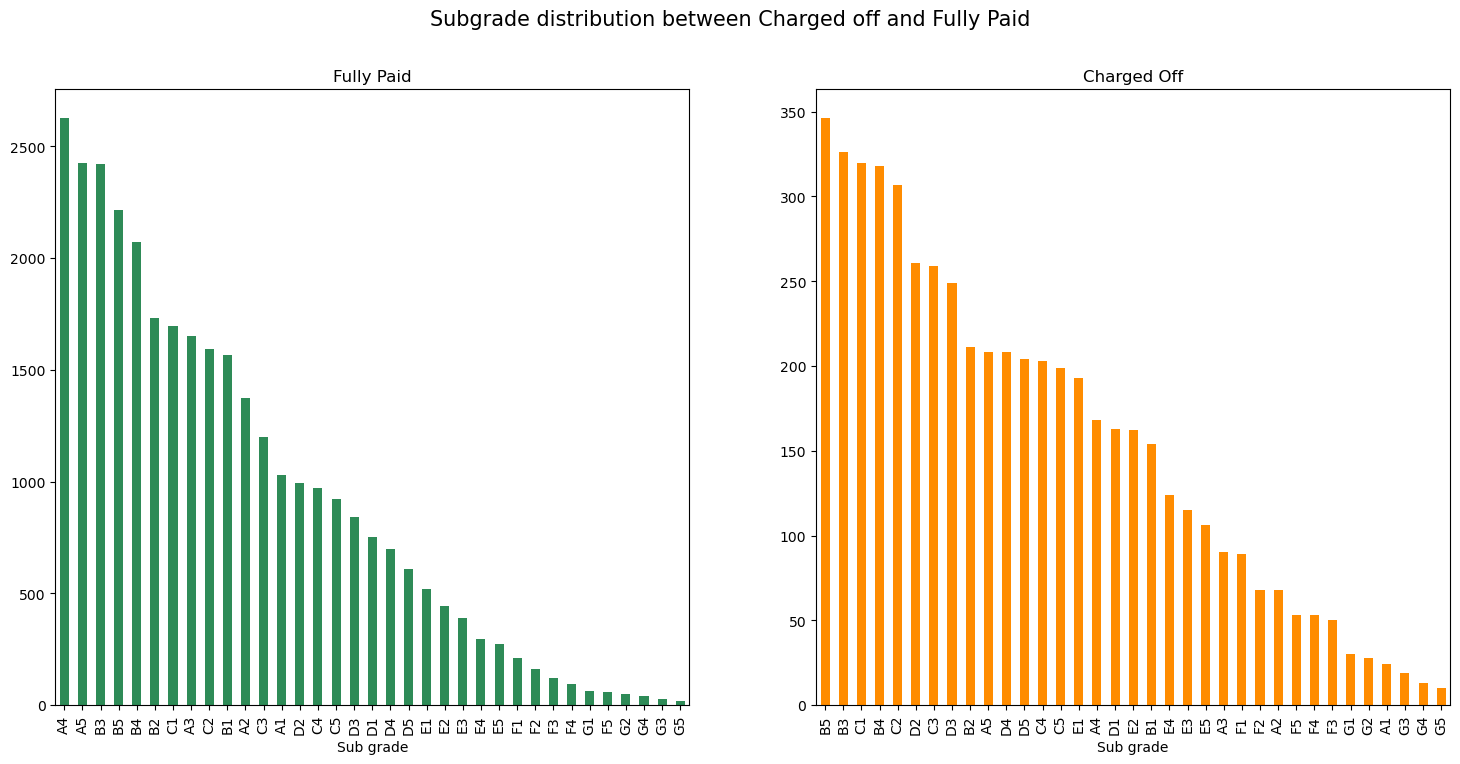

In [169]:
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
plt.xlabel('Sub grade')
plt.title('Fully Paid')
lc_fully_paid.sub_grade.value_counts().plot(kind='bar',color = "seagreen")


plt.subplot(1, 2, 2)
lc_charged_off.sub_grade.value_counts().plot(kind='bar',color = "darkorange")
plt.xlabel('Sub grade')
plt.title('Charged Off')

plt.suptitle("Subgrade distribution between Charged off and Fully Paid",fontsize=15)
plt.show()

In [170]:
lc_df.groupby('loan_status')['sub_grade'].describe()

count unique top  freq
loan_status                        
Charged Off   5399     35  B5   346
Fully Paid   32145     35  A4  2624

## Employee Lenght Vs Loan Status

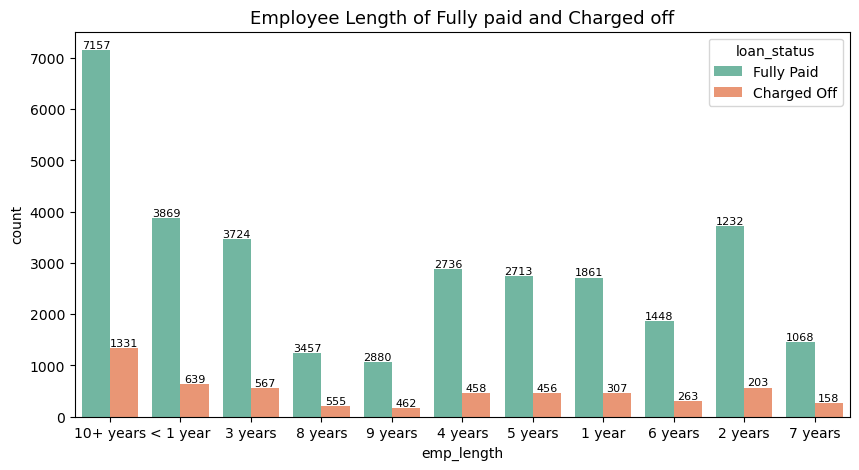

In [171]:
fig, ax = plt.subplots(figsize=(10,5))
g1 = sns.countplot(x="emp_length",data=lc_df, 
              palette="Set2", 
              hue = "loan_status")
label_values = lc_fully_paid['emp_length'].value_counts().values
g1.bar_label(container = g1.containers[0], labels=label_values, fontsize=8)

label_values1 = lc_charged_off['emp_length'].value_counts().values
g1.bar_label(container = g1.containers[1], labels=label_values1, fontsize=8)

g1.set_title("Employee Length of Fully paid and Charged off", fontsize=13)
g1.set_xlabel("emp_length")
plt.show()

In [172]:
lc_df.groupby("loan_status")['emp_length'].describe()

count unique        top  freq
loan_status                               
Charged Off   5399     11  10+ years  1331
Fully Paid   32145     11  10+ years  7157

## Home Ownership Vs Loan Status

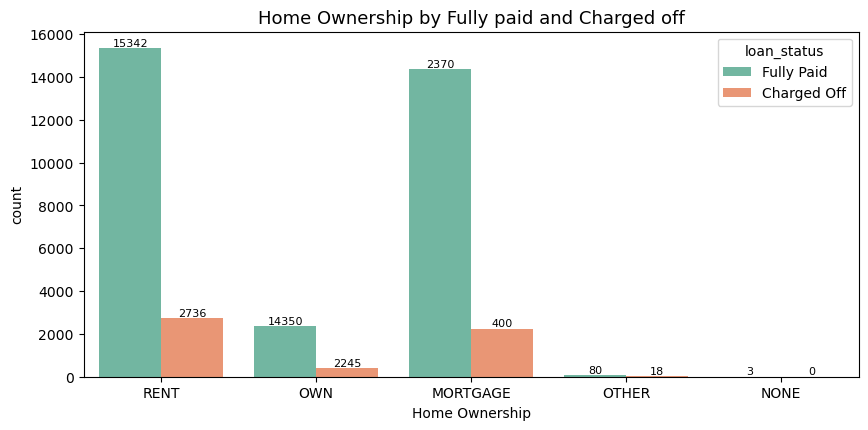

In [173]:
fig, ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g2 = sns.countplot(x="home_ownership",data=lc_df, 
              palette="Set2",
              hue = "loan_status")
label_values = lc_fully_paid['home_ownership'].value_counts().values
g2.bar_label(container = g2.containers[0], labels=label_values, fontsize=8)

label_values1 = lc_charged_off['home_ownership'].value_counts().values
g2.bar_label(container = g2.containers[1], labels=label_values1, fontsize=8)

g2.set_title("Home Ownership by Fully paid and Charged off", fontsize=13)
g2.set_xlabel("Home Ownership")
plt.show()

In [174]:
lc_df.groupby("loan_status")['home_ownership'].describe()

count unique   top   freq
loan_status                           
Charged Off   5399      4  RENT   2736
Fully Paid   32145      5  RENT  15342

### Categorical variable : verification_status

## Verification_status Vs Loan Status

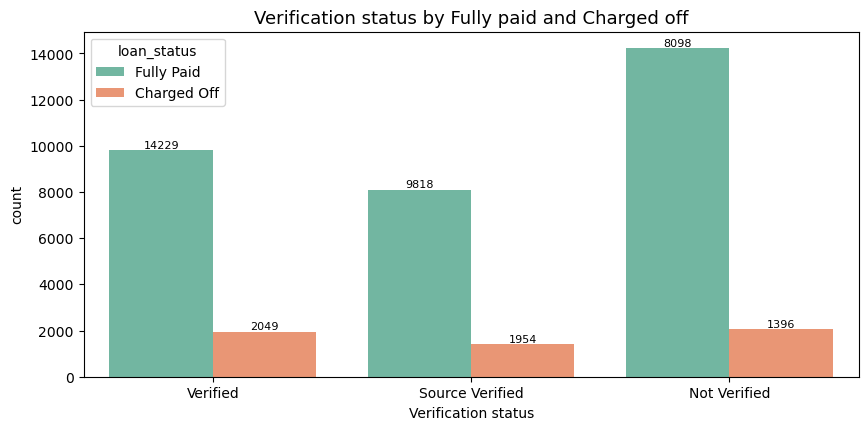

In [175]:
fig, ax = plt.subplots(figsize=(10,5))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g2 = sns.countplot(x="verification_status",data=lc_df, 
              palette="Set2",
              hue = "loan_status")
label_values = lc_fully_paid['verification_status'].value_counts().values
g2.bar_label(container = g2.containers[0], labels=label_values, fontsize=8)

label_values1 = lc_charged_off['verification_status'].value_counts().values
g2.bar_label(container = g2.containers[1], labels=label_values1, fontsize=8)

g2.set_title("Verification status by Fully paid and Charged off", fontsize=13)
g2.set_xlabel("Verification status")
plt.show()

In [176]:
lc_df.groupby("loan_status")['verification_status'].describe()

count unique           top   freq
loan_status                                   
Charged Off   5399      3  Not Verified   2049
Fully Paid   32145      3  Not Verified  14229

### Conclusion:

#### Conclusion:

### Conclusion: Above are the categorical variables with it unique values

In [251]:
fig = px.box(lc_df, x="loan_status", y="loan_amnt",title="Loan amount between loan status")
fig.show()

In [181]:
lc_df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5399.0  12244.077607  8086.515636  900.0  6000.0  10000.0   
Fully Paid   32145.0  10930.419972  7206.743260  500.0  5400.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0

### Bivariate Analysis

## Loan Amount vs Interest Rate

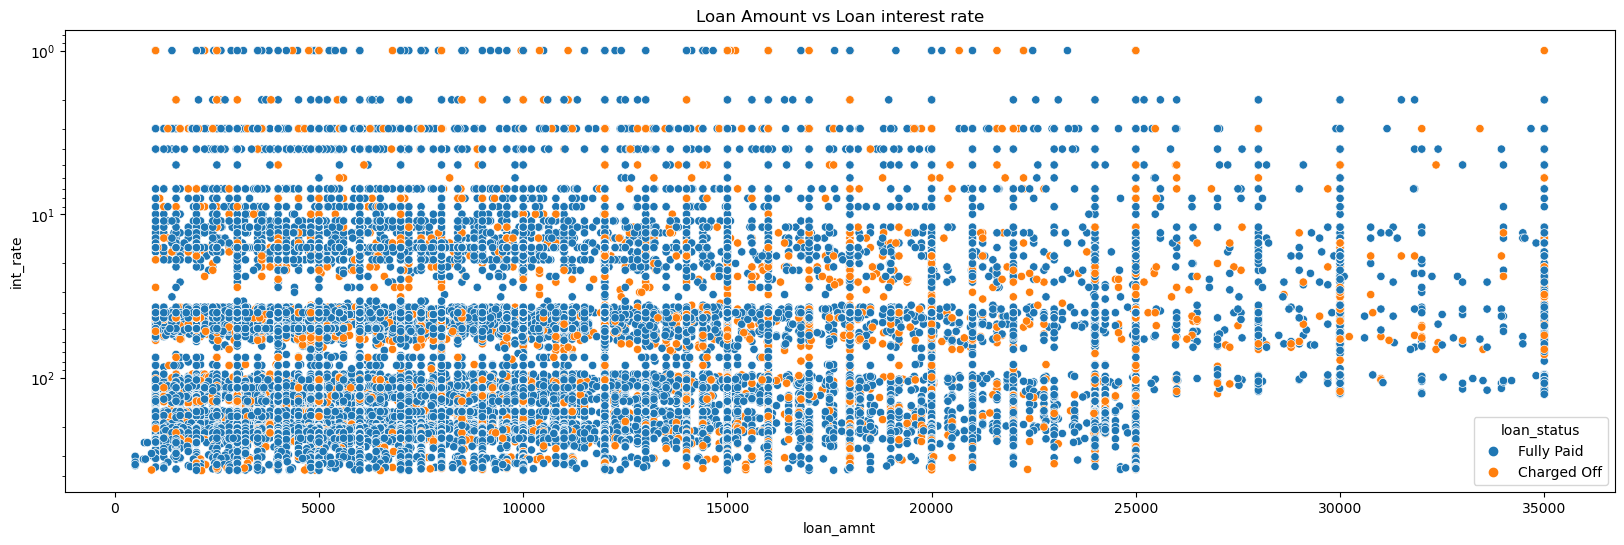

In [201]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=lc_df, hue='loan_status')
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

Observation : Values are spread widely . No clear pattern is obsereved.

## Loan Amount vs Annual income

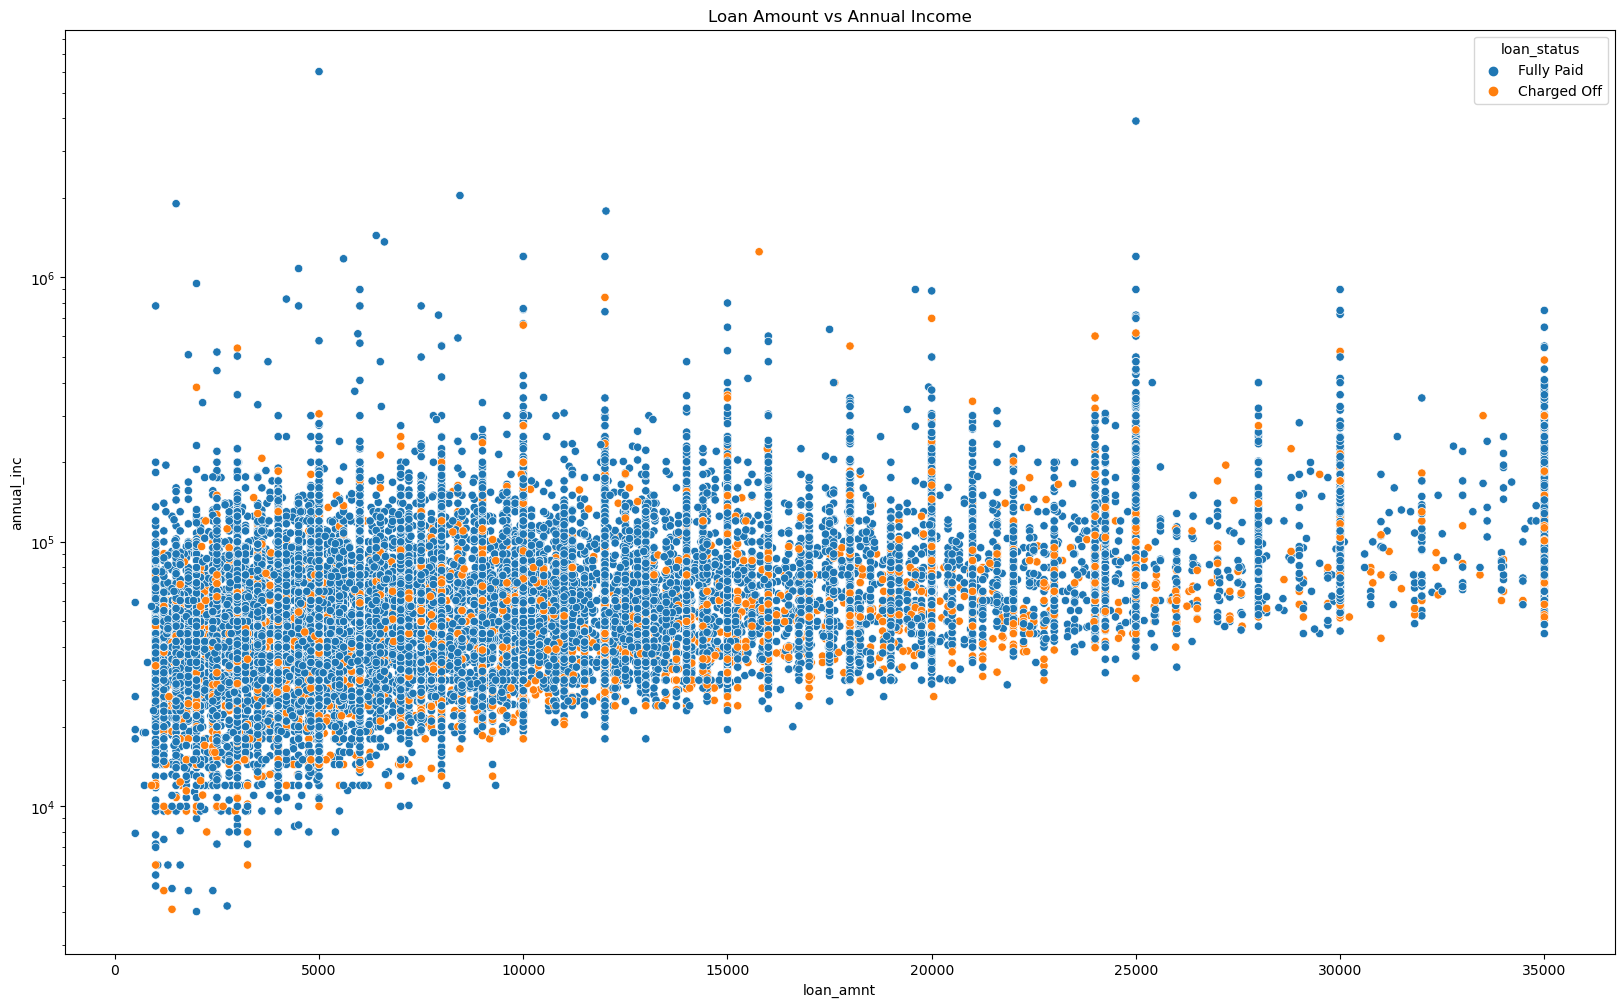

In [203]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=lc_df , hue = 'loan_status')
plt.yscale('log')
plt.title('Loan Amount vs Annual Income')
plt.show()

Observation : The loan amount is not increasing much with annual income.

## Loan Amount Vs DTI

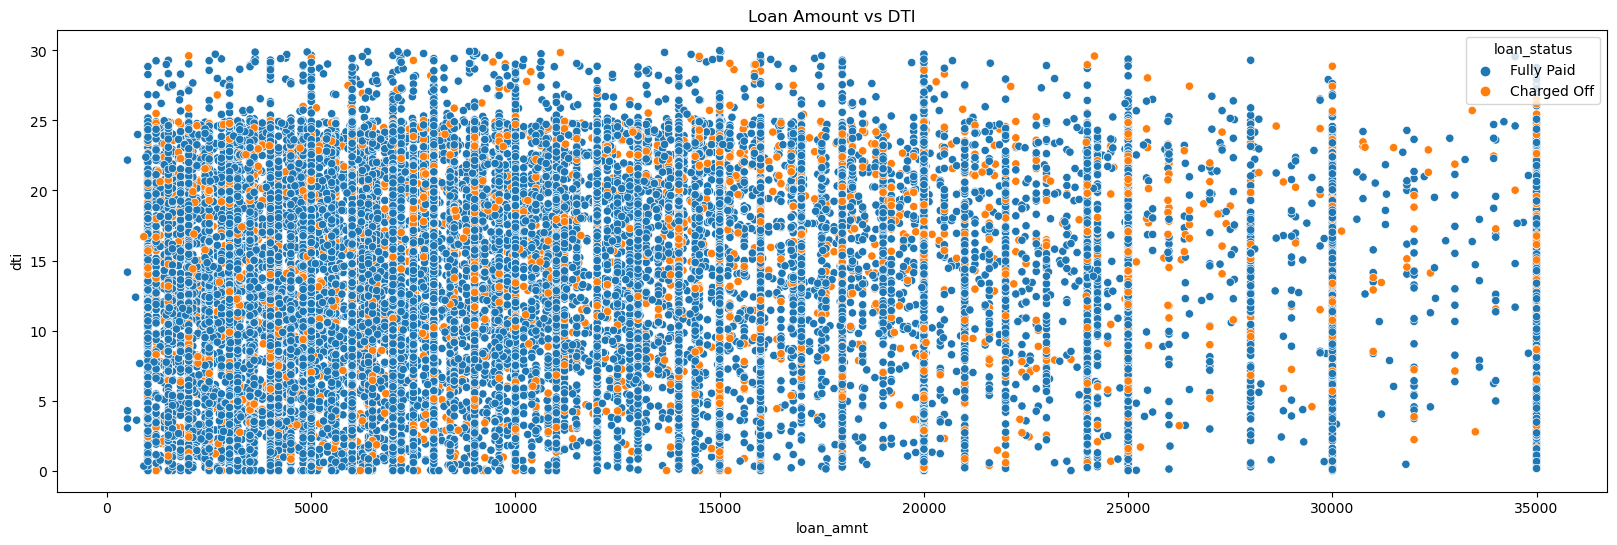

In [295]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=lc_df, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

Observation : Data is very scattered and no pattern found.

## Interest Rate vs DTI

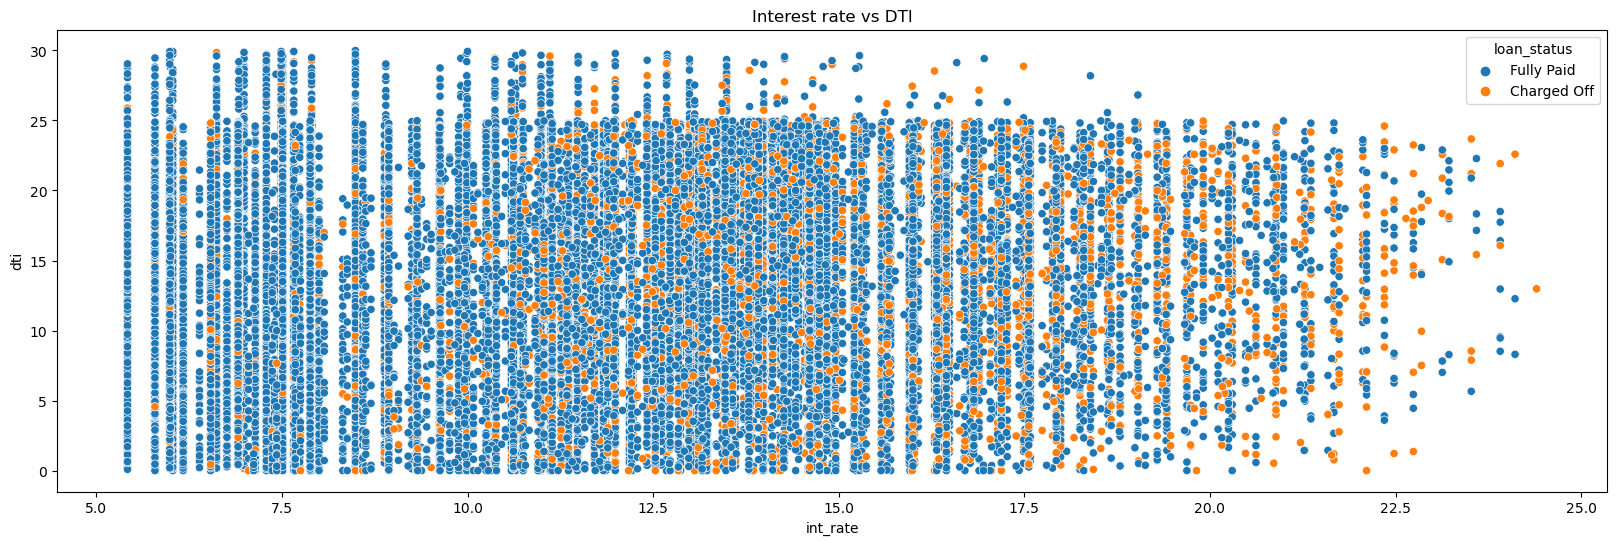

In [296]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=lc_df, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

Observations : Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

## Dervied Columns

In [238]:
lc_df["ratio_loan_funded"] = lc_df["funded_amnt_inv"] *100/lc_df["loan_amnt"]
lc_df

loan_amnt  funded_amnt  funded_amnt_inv term int_rate  installment  \
0           5000         5000           4975.0   36   10.65%       162.87   
1           2500         2500           2500.0   60   15.27%        59.83   
2           2400         2400           2400.0   36   15.96%        84.33   
3          10000        10000          10000.0   36   13.49%       339.31   
5           5000         5000           5000.0   36    7.90%       156.46   
...          ...          ...              ...  ...      ...          ...   
39712       2500         2500           1075.0   36    8.07%        78.42   
39713       8500         8500            875.0   36   10.28%       275.38   
39714       5000         5000           1325.0   36    8.07%       156.84   
39715       5000         5000            650.0   36    7.43%       155.38   
39716       7500         7500            800.0   36   13.75%       255.43   

      grade sub_grade                   emp_title emp_length  ...  \
0         B        B2                         NaN  10+ years  ...   
1         C        C4                       Ryder   < 1 year  ...   
2         C        C5                         NaN  10+ years  ...   
3         C        C1         AIR RESOURCES BOARD  10+ years  ...   
5         A        A4        Veolia Transportaton    3 years  ...   
...     ...       ...                         ...        ...  ...   
39712     A        A4             FiSite Research    4 years  ...   
39713     C        C1  Squarewave Solutions, Ltd.    3 years  ...   
39714     A        A4                         NaN   < 1 year  ...   
39715     A        A2                         NaN   < 1 year  ...   
39716     E        E2            Evergreen Center   < 1 year  ...   

       loan_status  pymnt_plan             purpose    dti Borr_Agency  \
0       Fully Paid           n         credit_card  27.65       100.0   
1      Charged Off           n                 car   1.00       100.0   
2       Fully Paid           n      small_business   8.72       100.0   
3       Fully Paid           n               other  20.00       100.0   
5       Fully Paid           n             wedding  11.20       100.0   
...            ...         ...                 ...    ...         ...   
39712   Fully Paid           n    home_improvement  11.33       100.0   
39713   Fully Paid           n         credit_card   6.40       100.0   
39714   Fully Paid           n  debt_consolidation   2.30       100.0   
39715   Fully Paid           n               other   3.72       100.0   
39716   Fully Paid           n  debt_consolidation  14.29       100.0   

      agency_Inves issue_d_month  issue_d_year  Ratio_loan_funded  \
0        99.500000            12          2011          99.500000   
1       100.000000            12          2011         100.000000   
2       100.000000            12          2011         100.000000   
3       100.000000            12          2011         100.000000   
5       100.000000            12          2011         100.000000   
...            ...           ...           ...                ...   
39712    43.000000             7          2007          43.000000   
39713    10.294118             7          2007          10.294118   
39714    26.500000             7          2007          26.500000   
39715    13.000000             7          2007          13.000000   
39716    10.666667             6          2007          10.666667   

       ratio_loan_funded  
0              99.500000  
1             100.000000  
2             100.000000  
3             100.000000  
5             100.000000  
...                  ...  
39712          43.000000  
39713          10.294118  
39714          26.500000  
39715          13.000000  
39716          10.666667  

[37544 rows x 24 columns]

### Derived Bivariate analysis

## Ratio loan amount vs Funded amount

In [258]:
lc_ratio = lc_df[lc_df["ratio_loan_funded"] <90]
lc_ratio.sort_values(by="ratio_loan_funded",ascending=False)
lc_ratio

loan_amnt  funded_amnt  funded_amnt_inv term int_rate  installment  \
26         15000        15000           8725.0   36   14.27%       514.64   
61         17500         8950           8925.0   60   17.27%       223.74   
66         12500         8925           8925.0   60   17.27%       223.11   
70         20975        13575          13550.0   60   17.58%       341.63   
80         35000        22075          22050.0   60   17.27%       551.84   
...          ...          ...              ...  ...      ...          ...   
39712       2500         2500           1075.0   36    8.07%        78.42   
39713       8500         8500            875.0   36   10.28%       275.38   
39714       5000         5000           1325.0   36    8.07%       156.84   
39715       5000         5000            650.0   36    7.43%       155.38   
39716       7500         7500            800.0   36   13.75%       255.43   

      grade sub_grade                   emp_title emp_length  ...  \
26        C        C2                 nyc transit    9 years  ...   
61        D        D3                         NaN    6 years  ...   
66        D        D3             grandma kitchen    5 years  ...   
70        D        D4          Dollar Tree Stores    5 years  ...   
80        D        D3   tutor Per ini Corporation    3 years  ...   
...     ...       ...                         ...        ...  ...   
39712     A        A4             FiSite Research    4 years  ...   
39713     C        C1  Squarewave Solutions, Ltd.    3 years  ...   
39714     A        A4                         NaN   < 1 year  ...   
39715     A        A2                         NaN   < 1 year  ...   
39716     E        E2            Evergreen Center   < 1 year  ...   

       loan_status  pymnt_plan             purpose    dti Borr_Agency  \
26     Charged Off           n  debt_consolidation  15.22  100.000000   
61      Fully Paid           n      small_business  19.47   51.142857   
66     Charged Off           n  debt_consolidation  13.16   71.400000   
70      Fully Paid           n         credit_card  18.79   64.719905   
80      Fully Paid           n    home_improvement   7.51   63.071429   
...            ...         ...                 ...    ...         ...   
39712   Fully Paid           n    home_improvement  11.33  100.000000   
39713   Fully Paid           n         credit_card   6.40  100.000000   
39714   Fully Paid           n  debt_consolidation   2.30  100.000000   
39715   Fully Paid           n               other   3.72  100.000000   
39716   Fully Paid           n  debt_consolidation  14.29  100.000000   

      agency_Inves issue_d_month  issue_d_year  Ratio_loan_funded  \
26       58.166667            12          2011          58.166667   
61       99.720670            12          2011          51.000000   
66      100.000000            12          2011          71.400000   
70       99.815838            12          2011          64.600715   
80       99.886750            12          2011          63.000000   
...            ...           ...           ...                ...   
39712    43.000000             7          2007          43.000000   
39713    10.294118             7          2007          10.294118   
39714    26.500000             7          2007          26.500000   
39715    13.000000             7          2007          13.000000   
39716    10.666667             6          2007          10.666667   

       ratio_loan_funded  
26             58.166667  
61             51.000000  
66             71.400000  
70             64.600715  
80             63.000000  
...                  ...  
39712          43.000000  
39713          10.294118  
39714          26.500000  
39715          13.000000  
39716          10.666667  

[4737 rows x 24 columns]

In [260]:
lc_ratio.shape

(4737, 24)

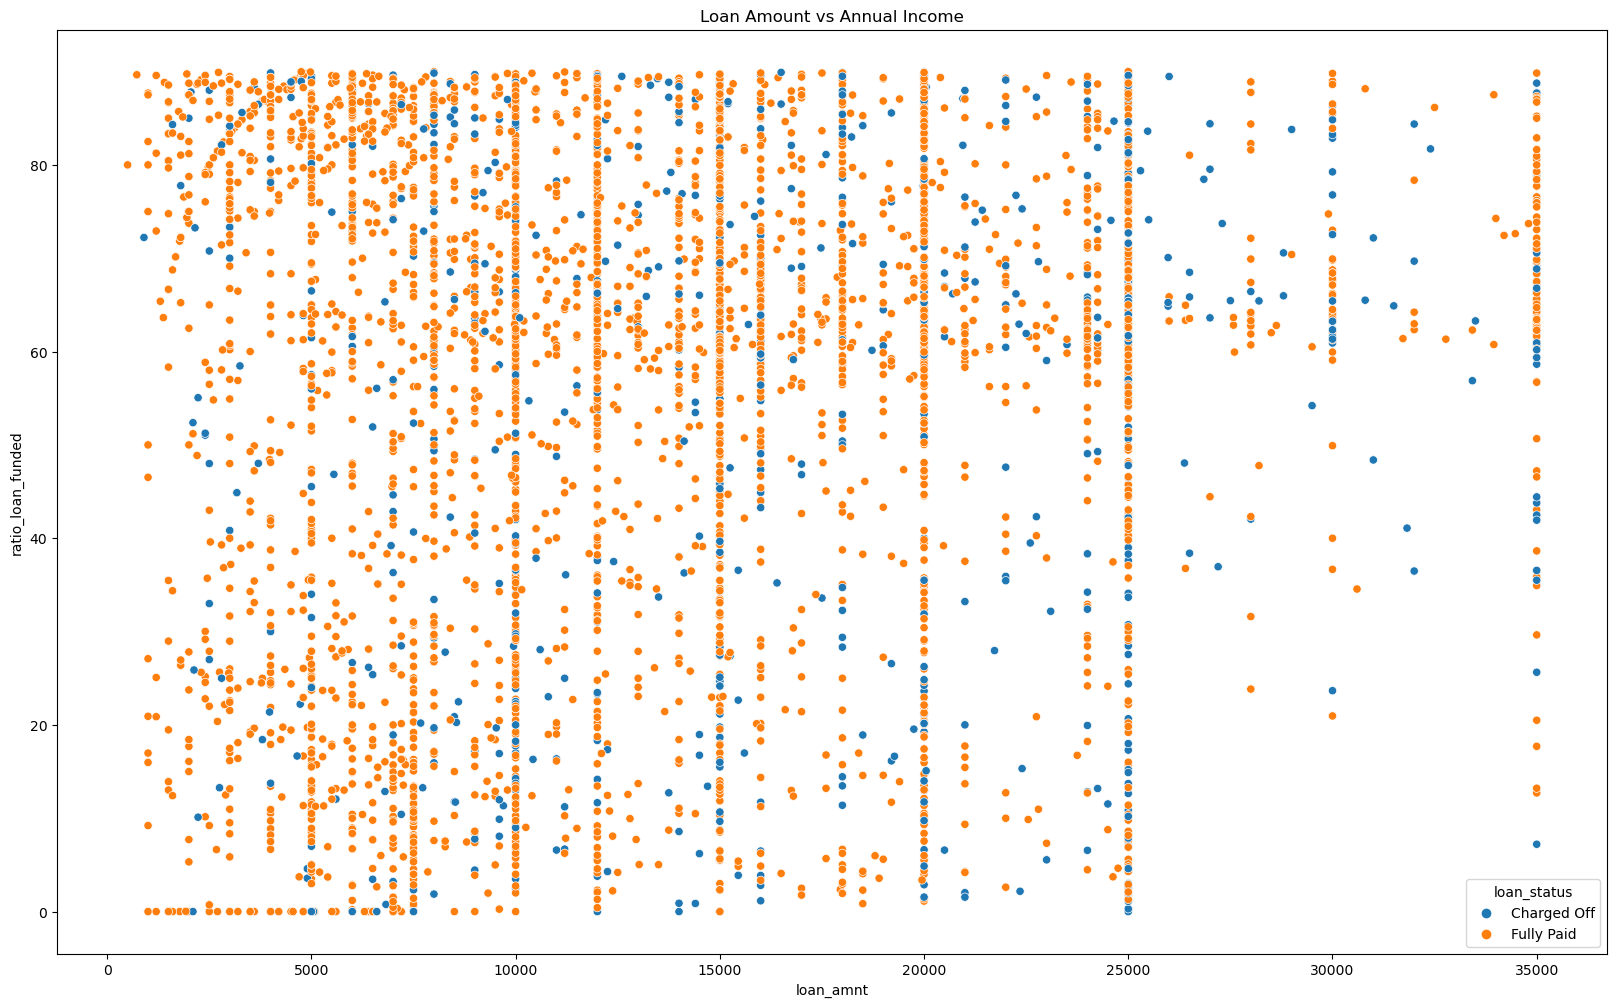

In [261]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='loan_amnt', y='ratio_loan_funded', data=lc_new , hue = 'loan_status')
#plt.yscale('log')
plt.title('Loan Amount vs Annual Income')
plt.show()

If we considering less than 90 data of Ratio between loan amount and funded amount . Most of borrower are defaulted . 
Its risky for lending club to aprove loan of these customer.



## Issue Year/Month Vs Funded Amount by Investor

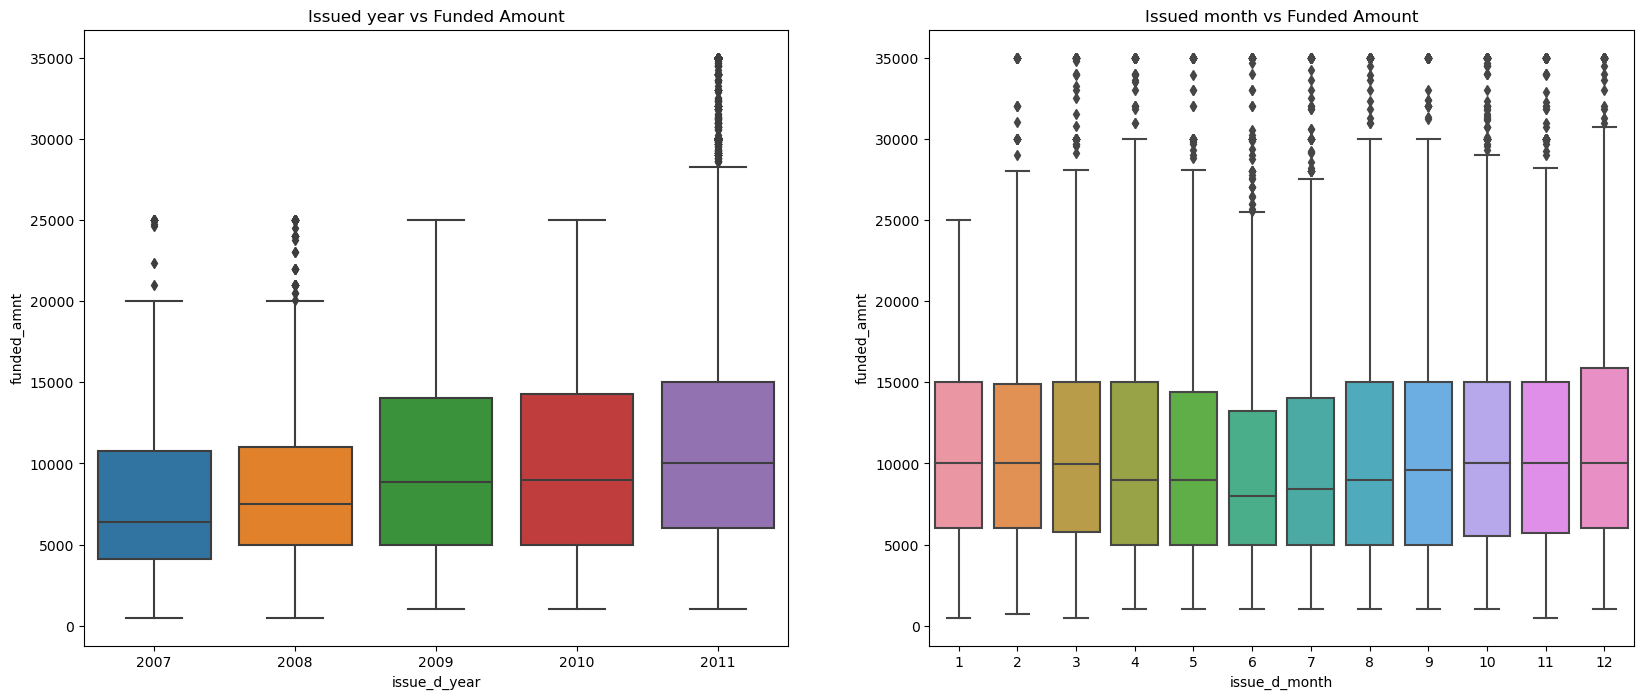

In [262]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x=lc_df.issue_d_year, y=lc_df.funded_amnt, data=lc_df)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=lc_df.issue_d_month, y=lc_df.funded_amnt, data=lc_df)
plt.title('Issued month vs Funded Amount')
plt.show()

The Loan amount is increasing each year but median is not changing much . In 2008 and 2011 are having many outliers. The loan amount doesnot change in any month expect December.

### Observations
##### 1. 75% of applicants who have Fully paid loans requested 15000 and below.
##### 2. Charged off loans have higher average loan amount request compared to Fully paid loans. 
##### 3. 75% of Charged off applicants have requested for loan amount below 17000

In [214]:
lc_corr= lc_df.corr()
lc_corr

loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt           1.000000     0.981603         0.936871     0.931686   
funded_amnt         0.981603     1.000000         0.955300     0.957721   
funded_amnt_inv     0.936871     0.955300         1.000000     0.904110   
installment         0.931686     0.957721         0.904110     1.000000   
annual_inc          0.266282     0.261959         0.249320     0.264684   
dti                 0.061402     0.061251         0.070007     0.050727   
Borr_Agency        -0.209495    -0.033761        -0.020871     0.007684   
agency_Inves       -0.025076    -0.015071         0.234367    -0.045588   
issue_d_month       0.052812     0.042576         0.069273     0.029796   
issue_d_year        0.115074     0.126093         0.259073     0.057550   
Ratio_loan_funded  -0.104984    -0.034197         0.198279    -0.046200   
ratio_loan_funded  -0.104984    -0.034197         0.198279    -0.046200   

                   annual_inc       dti  Borr_Agency  agency_Inves  \
loan_amnt            0.266282  0.061402    -0.209495     -0.025076   
funded_amnt          0.261959  0.061251    -0.033761     -0.015071   
funded_amnt_inv      0.249320  0.070007    -0.020871      0.234367   
installment          0.264684  0.050727     0.007684     -0.045588   
annual_inc           1.000000 -0.123582    -0.050831     -0.010911   
dti                 -0.123582  1.000000    -0.010083      0.040822   
Borr_Agency         -0.050831 -0.010083     1.000000      0.120437   
agency_Inves        -0.010911  0.040822     0.120437      1.000000   
issue_d_month        0.009557  0.012125    -0.071124      0.086467   
issue_d_year         0.012689  0.094332     0.087072      0.586072   
Ratio_loan_funded   -0.028274  0.033385     0.442955      0.936197   
ratio_loan_funded   -0.028274  0.033385     0.442955      0.936197   

                   issue_d_month  issue_d_year  Ratio_loan_funded  \
loan_amnt               0.052812      0.115074          -0.104984   
funded_amnt             0.042576      0.126093          -0.034197   
funded_amnt_inv         0.069273      0.259073           0.198279   
installment             0.029796      0.057550          -0.046200   
annual_inc              0.009557      0.012689          -0.028274   
dti                     0.012125      0.094332           0.033385   
Borr_Agency            -0.071124      0.087072           0.442955   
agency_Inves            0.086467      0.586072           0.936197   
issue_d_month           1.000000     -0.035307           0.052218   
issue_d_year           -0.035307      1.000000           0.556976   
Ratio_loan_funded       0.052218      0.556976           1.000000   
ratio_loan_funded       0.052218      0.556976           1.000000   

                   ratio_loan_funded  
loan_amnt                  -0.104984  
funded_amnt                -0.034197  
funded_amnt_inv             0.198279  
installment                -0.046200  
annual_inc                 -0.028274  
dti                         0.033385  
Borr_Agency                 0.442955  
agency_Inves                0.936197  
issue_d_month               0.052218  
issue_d_year                0.556976  
Ratio_loan_funded           1.000000  
ratio_loan_funded           1.000000

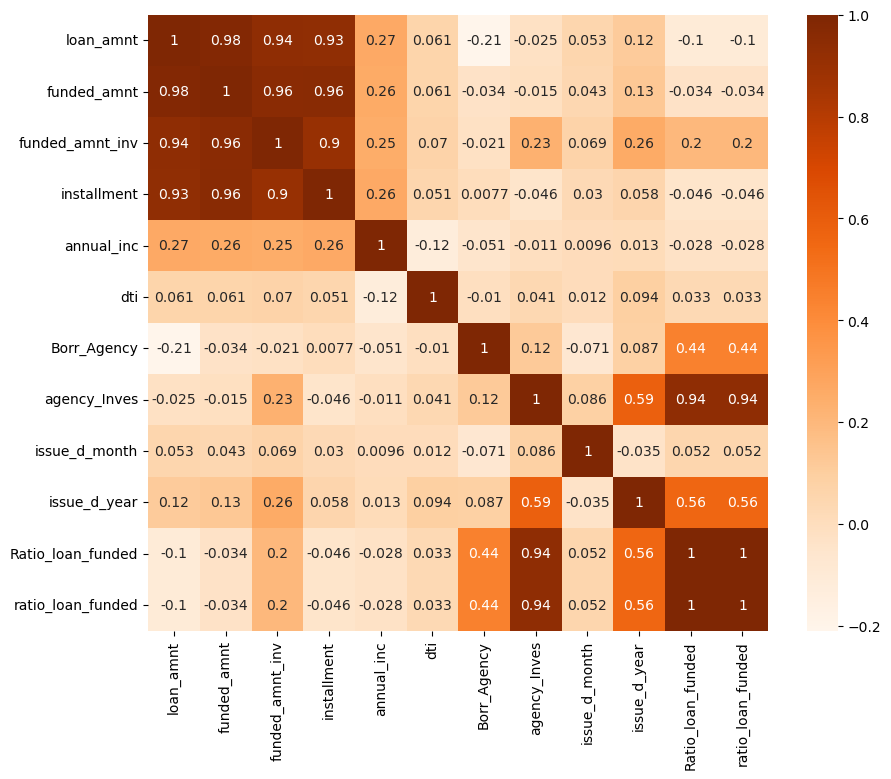

In [237]:
plt.figure(figsize =(10,8))
sns.heatmap(lc_corr , annot=True ,cmap = 'Oranges')
plt.show()

### Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

#### Continuous variable are loan_amnt, funded_amnt_inv
#### Ordered categorical variable are term, grade, sub_grade

Observation :
1. Lending club should reduce the high interest rate loans of 60 months tenture , these loans are more prone to default.
2. Small Bussiness loans are more defaulted , So these loan should be stop/reduced.
3. Grade are good metric for detecting defaulters. Loan should be exaimed more for low grades.
4. Borrowers with mortage home ownership are taking higher loan, and defaulted , these loan should be reduced.
5. If Ratio of loan amount and funded amount is less than 90% . Most of borrower are defaulted . Its risky for lending club to approve loan to these customer.